# Toronto Dwellings Analysis Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions to create a Panel dashboard.

In [40]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [41]:
# Initialize the Panel Extensions (for Plotly)
import panel as pn
pn.extension("plotly")

In [42]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [43]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

### Global available data

In [44]:
yearly_mean=to_data.groupby('year').mean()
shelter_df=yearly_mean[['shelter_costs_owned','shelter_costs_rented']]
neighbourhood_df=to_data[['neighbourhood','average_house_value']]
house_values=neighbourhood_df.groupby('neighbourhood').mean()
house_values=house_values.sort_values(by='average_house_value', ascending=False)
house_values=house_values.iloc[0:10,:]

### Panel Visualization Functions

In [76]:
# Define Panel visualization functions
def neighbourhood_map():
    """Neighbourhood Map"""
    
    file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
    df_neighbourhood_locations = pd.read_csv(file_path).set_index('neighbourhood')
    df_neighbourhood_locations.head()
    group_neighbourhood=to_data.groupby('neighbourhood').mean()
    map_neighbourhood=group_neighbourhood.join(df_neighbourhood_locations, how='inner')
    mapbox_plot=px.scatter_mapbox(
    map_neighbourhood, 
    lat='lat', 
    lon='lon', 
    color='average_house_value',
    size_max=10,
    size='average_house_value',
    color_continuous_scale=px.colors.cyclical.IceFire,
    width=700,
    height=500,
    zoom=9,
    title='Average House Prices in Toronto'
    )
    return mapbox_plot

def create_bar_chart(year, color):
    """
    Create a barplot based in the data argument.
    """
    year_count=to_data.groupby('year').sum()
    dwelling_df=year_count.drop(['average_house_value','shelter_costs_owned','shelter_costs_rented'], axis=1)
    data=dwelling_df.loc[[year]].transpose()
    barchart=data.plot(
        title=f'Dwelling Types in Toronto {year}',
        xlabel=str(year),
        ylabel='Dwelling Type Units', 
        color=color, 
        rot=90, 
        kind='bar', 
        legend=False)

    return barchart.figure;

def create_line_chart(data, title, color):
    """
    Create a line chart based in the data argument.
    """
    
    linechart=data.reset_index().plot(
        title=str(title),
        x='year',
        xlabel='Year',
        ylabel='Avg Monthly Shelter Costs', 
        color=str(color), 
        rot=90,  
        legend=False,
        kind='line')
    return linechart.figure;
def average_house_value():
    """Average house values per year."""
    yearly_mean=to_data.groupby('year').mean()
    avg_house_df=yearly_mean['average_house_value'].reset_index()
    avg_houseplot=avg_house_df.plot(x='year', y='average_house_value', title='Average House Value in Toronto', legend=False)
    return avg_houseplot.figure;

    
def average_value_by_neighbourhood():
    """Average house values by neighbourhood."""
    neighbourhood_df=to_data[['neighbourhood','average_house_value']]
    avg_value_neighbourhood=neighbourhood_df.hvplot.line(xlabel='Year', ylabel='Avg House Value', groupby='neighbourhood')
    return avg_value_neighbourhood
def number_dwelling_types():
    """Number of dwelling types per year"""
    dwelling_neighbourhood=to_data.drop(['average_house_value','shelter_costs_owned','shelter_costs_rented'], axis=1)
    dwelling_types=dwelling_neighbourhood.hvplot.bar(groupby='neighbourhood', height=500, rot=90, xlabel='Year', ylabel='Dwelling Type Units')
    return dwelling_types
def average_house_value_snapshot():
    """Average house value for all Toronto's neighbourhoods per year."""
    neighbourhood_df=to_data[['neighbourhood','average_house_value']]
    fig = make_subplots(
    rows=4, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.02)
    a=0
    for x in [2001,2006,2011,2016]:
        a=a+1
        fig1 = px.bar(
            neighbourhood_df.loc[x],
            x='neighbourhood', 
            y='average_house_value',
            color='average_house_value')
        fig.add_trace(fig1['data'][0], row=a, col=1)
    
    fig.update_layout(height=600, width=600,title_text="Average House Values in Toronto per Neighbourhood")
    return fig

def top_most_expensive_neighbourhoods():
    """Top 10 most expensive neighbourhoods."""
    expen_neighbourhoods=house_values.hvplot.bar(rot=90, height=500, xlabel='Neighbourhood', ylabel='Avg House Value', title='Top 10 Most Expensive Neighbourhoods in Toronto')
    return expen_neighbourhoods
def sunburts_cost_analysis():
    """Sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year."""
    values=house_values.reset_index()
    rich_neighbourhoods=to_data.loc[to_data['neighbourhood'].isin(values['neighbourhood'])]
    rich_neighbourhoods=rich_neighbourhoods.reset_index()
    figs = px.sunburst(
    rich_neighbourhoods,
    path=['year', 'neighbourhood'],
    values='shelter_costs_owned',
    color='shelter_costs_owned',
    title="Cost Analysis of Most Expensive Neighbourhoods in Toronto Each Year"
    )
    
    return figs

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

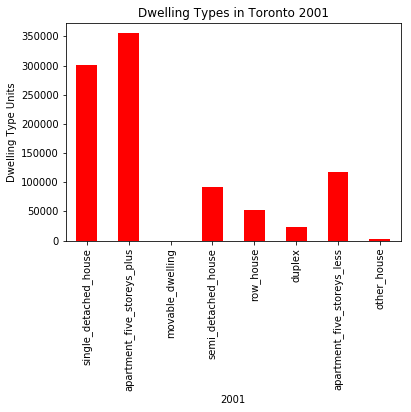

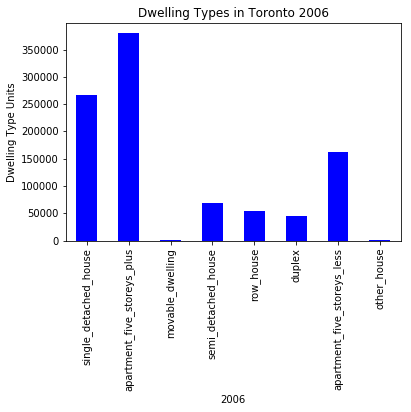

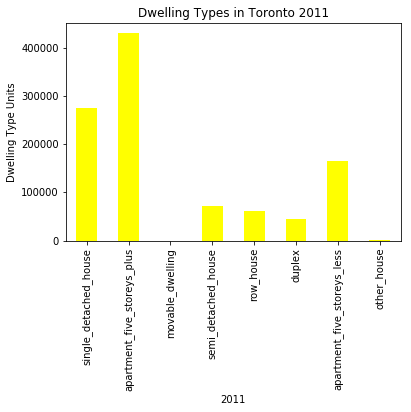

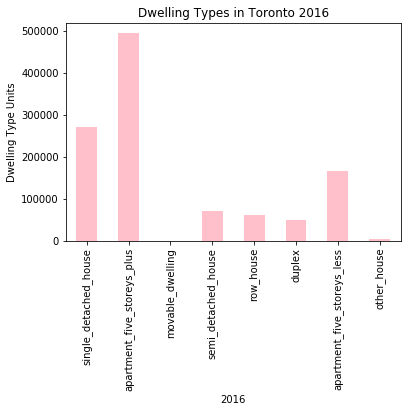

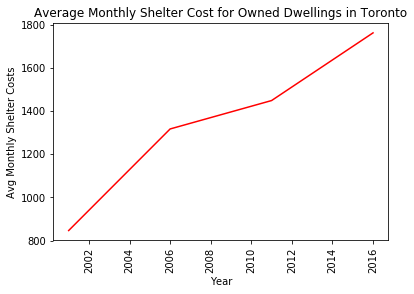

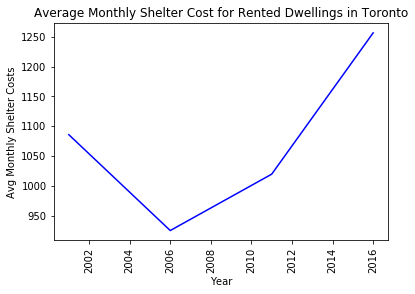

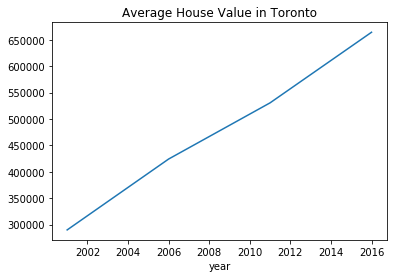

In [77]:
# Create a Title for the Dashboard
# YOUR CODE HERE!
title_column = pn.Column(
    pn.pane.Markdown('Real Estate Analysis of Toronto from 2001 to 2016'), 
    neighbourhood_map()
)
# Define a welcome text
# YOUR CODE HERE!

# Create a tab layout for the dashboard
# YOUR CODE HERE!
bar_charts=pn.Column(
    pn.Row(create_bar_chart(2001, 'red'),create_bar_chart(2006, 'blue')),
    pn.Row(create_bar_chart(2011, 'yellow'), create_bar_chart(2016, 'pink')))

line_charts=pn.Column(pn.Row(
    create_line_chart(shelter_df['shelter_costs_owned'], 'Average Monthly Shelter Cost for Owned Dwellings in Toronto', 'red'),
    create_line_chart(shelter_df['shelter_costs_rented'], 'Average Monthly Shelter Cost for Rented Dwellings in Toronto', 'blue')),
    average_house_value());

neighbourhood_charts=pn.Column(
    pn.Row(average_value_by_neighbourhood(),average_house_value_snapshot()),
    number_dwelling_types()
    )

expensive_charts=pn.Row(
    sunburts_cost_analysis(),
    top_most_expensive_neighbourhoods())

# Create the main dashboard
# YOUR CODE HERE!
dashboard=pn.Tabs(
    ("Welcome", title_column),
    ("Yearly Market Analysis", bar_charts),
    ("Shelter Costs Vs. House Value", line_charts),
    ('Sort by Neighbourhoods',neighbourhood_charts),
    ('Top Expensive Neighbourhoods',expensive_charts))


## Serve the Panel Dashboard

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Plotly(Figure)
    [1] Column
        [0] Row
            [0] Matplotlib(Figure)
            [1] Matplotlib(Figure)
        [1] Row
            [0] Matplotlib(Figure)
            [1] Matplotlib(Figure)
    [2] Column
        [0] Row
            [0] Matplotlib(Figure)
            [1] Matplotlib(Figure)
        [1] Matplotlib(Figure)
    [3] Column
        [0] Row
            [0] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                    [1] VSpacer()
            [1] Plotly(Figure)
        [1] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                [1] VSpacer()
    [4] Row
        [0] Plotly(Figure)
        [1] HoloViews(Bars)
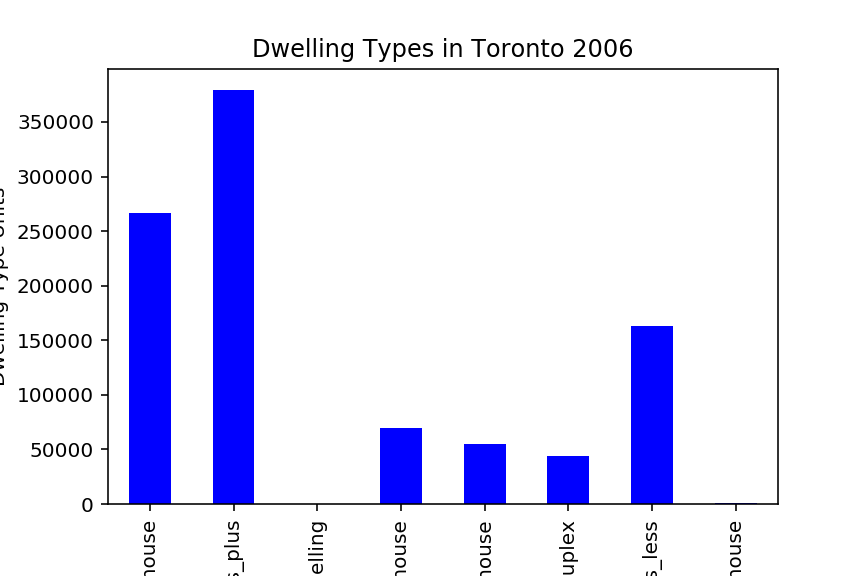
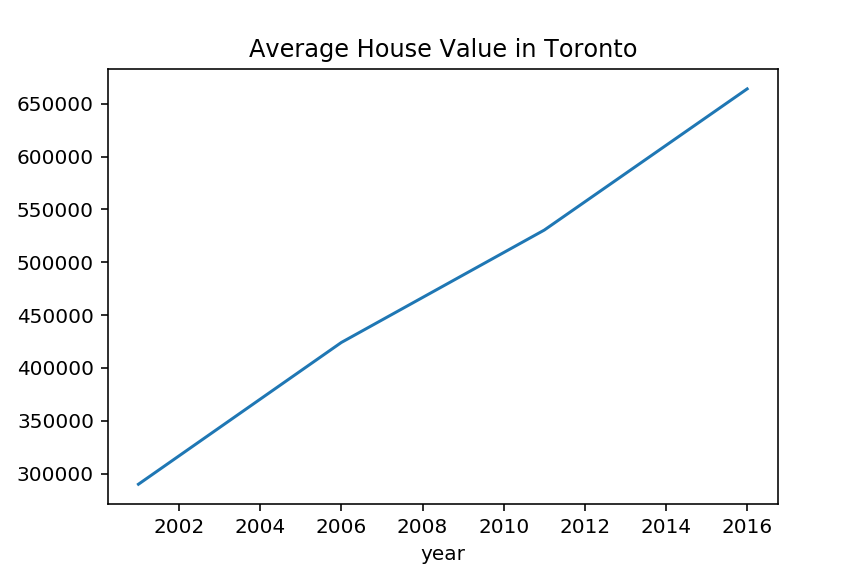
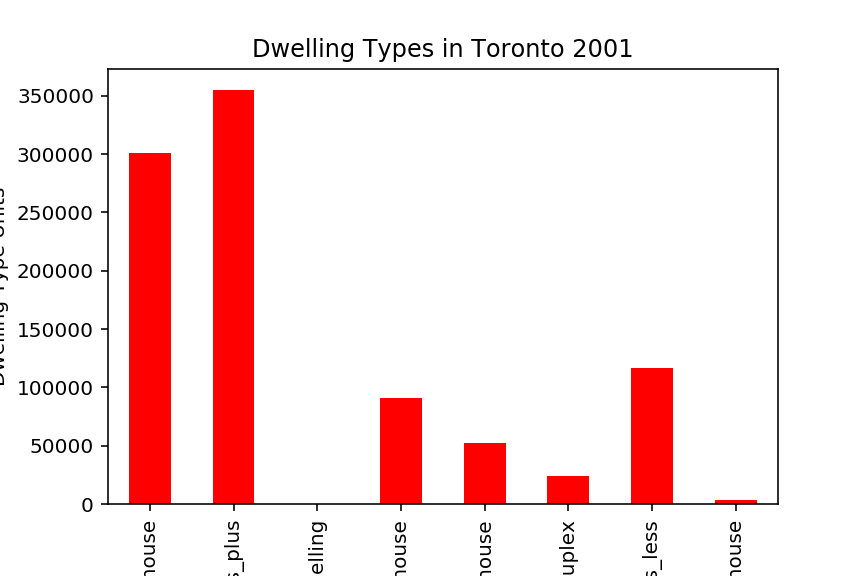
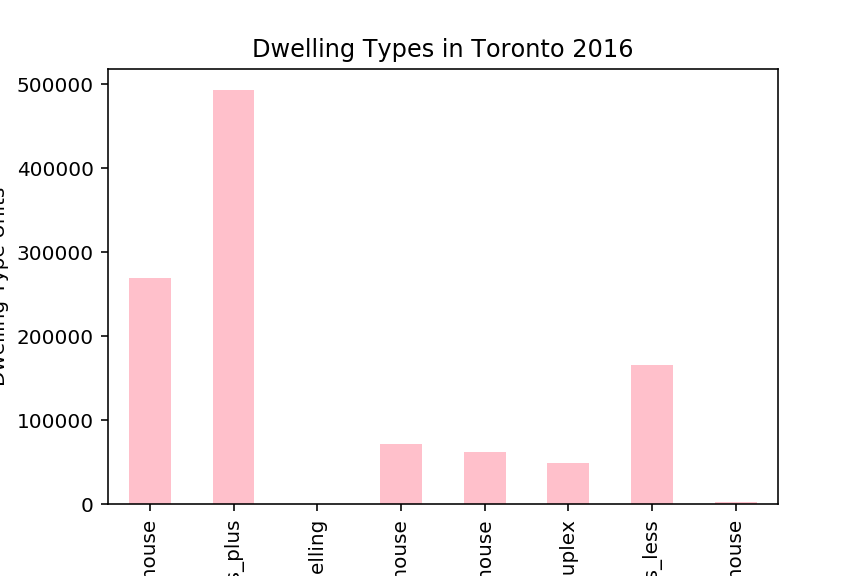
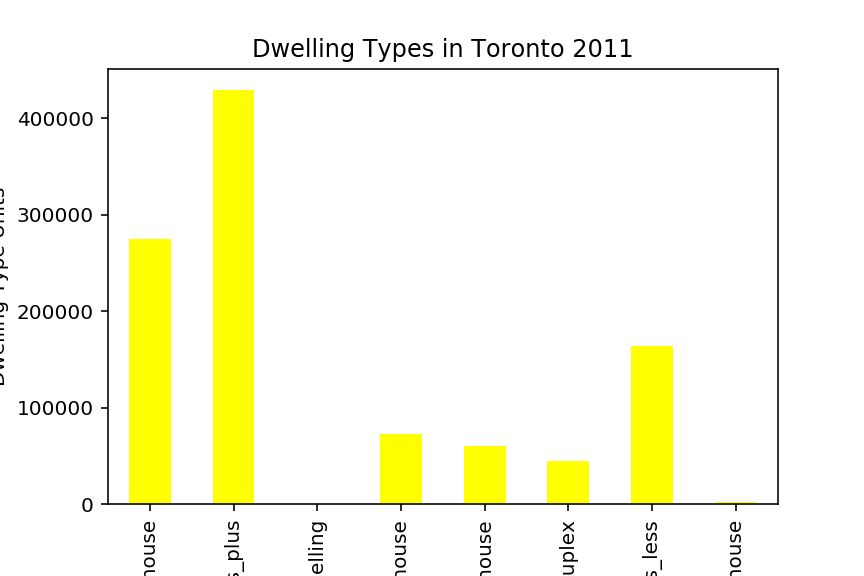
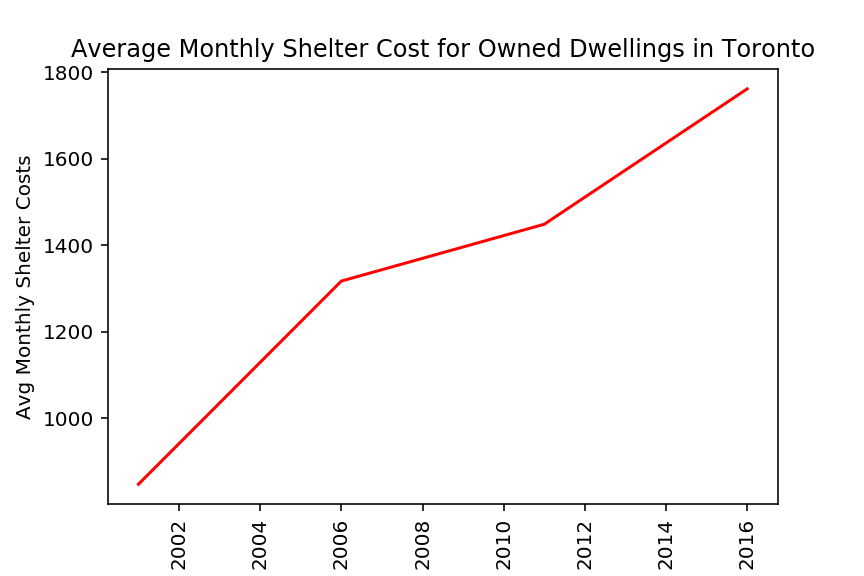
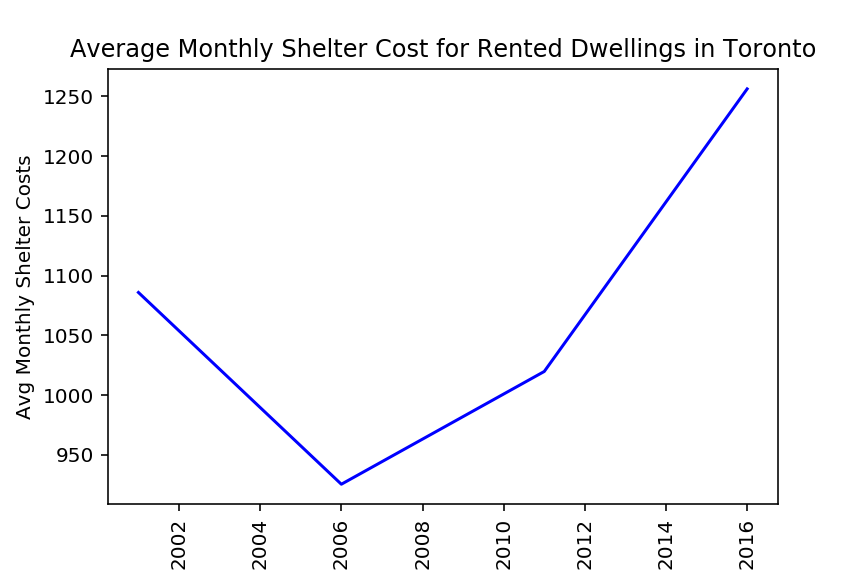

In [78]:
dashboard.servable()

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [84]:
# neighbourhood_map().show()

In [ ]:
# create_bar_chart(data, title, xlabel, ylabel, color)

# # Bar chart for 2001
# create_bar_chart(df_dwelling_units.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units", "red")

# # Bar chart for 2006
# create_bar_chart(df_dwelling_units.loc[2006], "Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units", "blue")

# # Bar chart for 2011
# create_bar_chart(df_dwelling_units.loc[2011], "Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units", "orange")

# # Bar chart for 2016
# create_bar_chart(df_dwelling_units.loc[2016], "Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units", "magenta")

In [ ]:
# create_line_chart(data, title, xlabel, ylabel, color)

# # Line chart for owned dwellings
# create_line_chart(df_avg_costs["shelter_costs_owned"], "Average Monthly Shelter Cost for Owned Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "blue")

# # Line chart for rented dwellings
# create_line_chart(df_avg_costs["shelter_costs_rented"], "Average Monthly Shelter Cost for Rented Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "orange")

In [ ]:
# average_house_value()

In [ ]:
# average_value_by_neighbourhood()

In [ ]:
# number_dwelling_types()

In [ ]:
# average_house_value_snapshot()

In [ ]:
# top_most_expensive_neighbourhoods()

In [ ]:
# sunburts_cost_analysis()